# Travail pratique d'apprentissage automatique sur les Machines à Vecteurs de Support dites SVM

## Réalisé par Mulapi Tita Ketsia

A propos

Dans ce travail, nous allons principalement nous focaliser sur l'algorithme SVM :

nous allons ensuite déterminer pour chacun des cas précédents que nous allons traiter et des différents noyaux que nous allons appliquer :

- Le **accuracy_score** qui est le taux de bonne performance, c'est à dire chercher le taux de bonne classification

Ensuite on va se permettre de trouver :

- le **precision_score** pour dire si le modèle de prédiction est précis

- il y aura le **recall_score** qui est un rappel des cas réel trouvé!

- Il s'en suivra du **f1_score** qui est fonction de la **précision** et du **rappel**, car elle les combine on dit que si ce denrier est petit alors, c'est à dire que la précision 

    f1_score = 2 * $ \frac{precision * rappel}{precision+rappel} $

et, est constituée d'une petite précision et d'un petit rappel (inversement pour le cas grand).

- une jolie matrice bleu en guise de matrice de confusion la recherche d'un hyperparamètre qui déterminera la meilleur valeur du paramètre C (Gamma ou tel que vu en cours de **TBD**) pour l'optimisation de notre modèle dapprentissage.

Et enfin, au bout du compte, un peu comme dans la pluspart des articles scientifiques sur les data sciences **nous allons résummer notre modèle à l'aide d'une représentation en bar (diagramme en bar).**

#### Rappel sur les notions d'un SVM :

    Modèle d'apprentissage puissant et polyvalent, une machine à vecteurs de suports est un séparateur à vaste marge c'est à dire que d'une part il s'adaptent bien à la classification des données complexes, de taille réduite ou moyenne, ce qui lui permet d'autre part de travailler sur des données linéaires ou non (contrairement à un perceptron) et, à la détection des données abérrantes (exemple : pièces défectueuses ou non déféctueuse, etc.)
    
    - Classification Linéaire :
        
        * 2 classes sont dîtes linéairement séparables, si et seulement si, elles peuvent aisément se séparer par une ligne doite (Aurélien Géron).
        
        * Hyperparamètres : On peut régulariser un modèle à l'aide d'un hyperpramètre, celui-ci permettra au modèle de moins sur ajuster à partir du moment où il sera petit.
        
        * LinearSVC : Très souvent considéré comme moins meilleur que le type de SVM dit SVC avec un nouyau linéaire, le LinearSVC peut se réaliser à l'aide d'un piline ,c'est à dire que ici il est conseillé de normaliser les données en apppliquant le théromè centra=l limite qui revient à centrer et à réduire les données par la moyenne et l'écart-r=type respectivmement, avant d'entraîner le modèle car, ce modèle qui est adaptable aux entraînement hors-mémoire, régularise le terme constant.
        
        
     - Classification SVM non Linéaire :
     
        * Dans la vrai vie (comme nous le dis très souvent notre professeur d'apprentissage), les données manipulées par le Data Scientist ne sont pas toujours linéaires, on pourrait même se retrouver face au fameux fléau de la dimensionalité. Afin donc d'y faire face, on pourrait par exemple rajouter des variables, (le cas des variables polynomiales) afin de se retrouver dnas une situation linéairement séparable.
        
        * SVC :
        
        Il existe une classe pour le faire, mais nous pourrons aussi utiliser un type de SVM que l'on appel SVC pour un type de classifieur SVM qui permet de traiter les données en fonction d'un noyau.
        
        * la notion du noyau :
        
        'astuce du noyau est un concept qui permet d'obtenir les mêmes résultats que lorsqu'on rajoute des variables supplémentaires sans en ajouter !!! On est donc épargné des explosions combinatoires, ainsi des noyau il en existe plusiseurs : RBF, Linéaire, Polynomial, Sigmoïd, etc.

## Importation des librairies

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score
from sklearn import metrics
import numpy as np

# phase de pré-traitement

Fonction d'ouvrerture d'un fichier

In [163]:
def open_file(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    classes=[]
    XList=[]
    YList=[]
    for line in lines:
        line = line.split(" ")
        classes.append(line[0])
        XList.append(line[1])
        YList.append(line[2].replace("\n",""))
    df = pd.DataFrame({"classes":classes,"X":XList,"Y":YList})
    #df.info()
    return df

Fonction de typage des colonnes

In [164]:
def df_formatter(df):
    df.classes = df.classes.astype("int")
    df.X = df.X.astype("float")
    df.Y = df.Y.astype("float")
    return df

Fonction qui nous permet d'afficher le jeu de données

In [165]:
def afficher_dataset(df):
    plt.figure(figsize=(15,8))
    for i in range(5): 
        plt.plot(df[df.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,1], df[df.iloc[:,0]==i+1].iloc[:,0:3].iloc[:,2], 'o', label="classes : "+str(i+1))
        plt.legend()

Nous récupérons les jeux de données : From file to DataFrame

In [166]:
df_app1 = open_file("data_tp1_app.txt")
df_app1 = df_formatter(df_app1)

In [167]:
df_dec1 = open_file("data_tp1_dec.txt")
df_dec1 = df_formatter(df_dec1)

In [168]:
df_app2 = open_file("data_tp2_app.txt")
df_app2 = df_formatter(df_app2)

In [169]:
df_dec2 = open_file("data_tp2_dec.txt")
df_dec2 = df_formatter(df_dec2)

In [170]:
df_app3 = open_file("data_tp3_app.txt")
df_app3 = df_formatter(df_app3)

In [171]:
df_dec3 = open_file("data_tp3_dec.txt")
df_dec3 = df_formatter(df_dec3)

## Commencez par tester l’implémentation par défaut d’un SVM.

In [172]:
model_summary =[]

Testez la solution svm.LinearSVC :
https://scikitlearn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
Cette fonction n’est disponible que pour des SVM linéaires. Donc à tester sur le jeu de
données TP1.

Performance: 0.994
Précision: 0.994
Rappel: 0.994
F1-score: 0.994


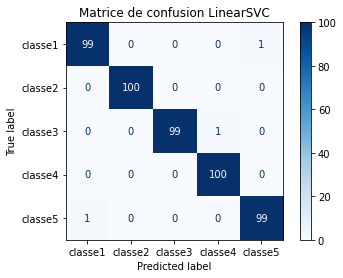

In [178]:
# Train & Test
X_train1, y_train1 = df_app1.iloc[:,1:3],df_app1.iloc[:,0]
X_test1, y_test1 = df_dec1.iloc[:,1:3],df_dec1.iloc[:,0]

# Model
classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))

classifier = classifier.fit(X_train1, y_train1)

# metrics
y_pred1 = classifier.predict(X_test1) 
print("Performance:", accuracy_score(y_test1, y_pred1))
print("Précision:", precision_score(y_test1, y_pred1,
                                               average='micro'))
print("Rappel:", recall_score(y_test1, y_pred1, 
                                               average='micro'))
print("F1-score:", f1_score(y_test1, y_pred1, 
                                             average='micro'))

# Matrice de confusion
class_names = ['classe1', 'classe2', 'classe3', 'classe4', 'classe5']
disp = plot_confusion_matrix(classifier, X_test1, y_test1,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     )
disp.ax_.set_title('Matrice de confusion LinearSVC')
plt.show()

### Commentaire :

Nous pouvons donc conclure que :

    Le taux de bonne classification de notre modèle est de 99.4%
    
    Notre modèle est précis à 99.4%
    
    Ce qui nous est rappelé est de 99.4%
    
    et enfin, notre f1_score est de 99.4%
    
    Dans notre matrice de confusion alors que 497 observations ont correctement été prédites, 3 seulement ont été mal prédites ce qui s'avère être bon.



*****

# 2) Utilisez la classe svm.SVC de scikit-learn :

En utilisant la documentation testez des SVM avec les paramètres suivants:
- Noyau: linéaire, C=1.0,
- Noyau: RBF, C=1.0, Gamma = 0.7,
- Noyau: Polynomial, C=1.0, degré: 3

A tester sur les jeux de données TP1 et TP2

In [14]:
def SVM_Classification(Model, noyau, hyp, df_app, df_dec, model_summary, g=None):
    
    # Train & Test
    X_train, y_train = df_app.iloc[:,1:3],df_app.iloc[:,0]
    X_test, y_test = df_dec.iloc[:,1:3],df_dec.iloc[:,0]
    
    if(g==None):
        g=0.7

    # Model
    if(noyau=="linear"):
        classifier = make_pipeline(StandardScaler(), Model(kernel=noyau, C=hyp, random_state=0, tol=1e-5))
    elif(noyau=="rbf"):
        classifier = make_pipeline(StandardScaler(), Model(kernel=noyau, C=hyp, gamma=g, random_state=0, tol=1e-5))
    elif(noyau=="poly"):
        classifier = make_pipeline(StandardScaler(), Model(kernel=noyau, C=hyp, degree=3, random_state=0, tol=1e-5))        
    else:
        classifier = make_pipeline(StandardScaler(), Model(kernel=noyau, C=hyp, random_state=0, tol=1e-5)) 
            
    classifier = classifier.fit(X_train, y_train)

    # metrics
    y_pred = classifier.predict(X_test) 
    print("Performance:", accuracy_score(y_test, y_pred))
    print("Précision:", precision_score(y_test, y_pred,
                                               average='micro'))
    print("Rappel:", recall_score(y_test, y_pred, 
                                               average='micro'))
    print("F1-score:", f1_score(y_test, y_pred, 
                                               average='micro'))
    model_summary.append(dict(model="SVM "+str(noyau), accuracy_score=accuracy_score(y_test, y_pred)))

    # Matrice de confusion
    class_names = ['classe1', 'classe2', 'classe3', 'classe4', 'classe5']
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     )
    disp.ax_.set_title('Matrice de confusion '+str(noyau)+' model')
    plt.show()

### Jeu TP1

In [15]:
model_summary_TP1 = []

Performance: 0.996
Précision: 0.996
Rappel: 0.996
F1-score: 0.996


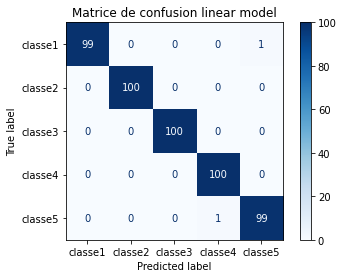

In [16]:
SVM_Classification(SVC, "linear", 1.0, df_app1, df_dec1, model_summary_TP1)

Performance: 0.996
Précision: 0.996
Rappel: 0.996
F1-score: 0.996


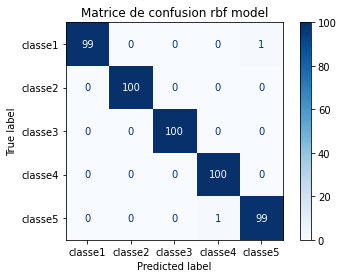

In [17]:
SVM_Classification(SVC, "rbf", 1.0, df_app1, df_dec1, model_summary_TP1)

Performance: 0.986
Précision: 0.986
Rappel: 0.986
F1-score: 0.986


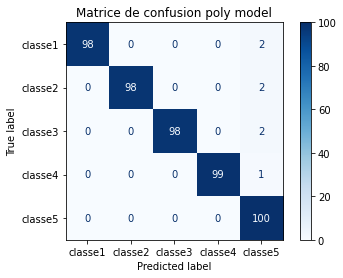

In [18]:
SVM_Classification(SVC, "poly", 1.0, df_app1, df_dec1, model_summary_TP1)

petit bonus :

Performance: 0.996
Précision: 0.996
Rappel: 0.996
F1-score: 0.996


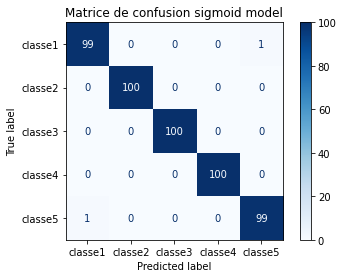

In [19]:
SVM_Classification(SVC, "sigmoid", 1.0, df_app1, df_dec1, model_summary_TP1)

## Jeu TP2

In [34]:
model_summary_TP2 = []

Performance: 0.952
Précision: 0.952
Rappel: 0.952
F1-score: 0.952


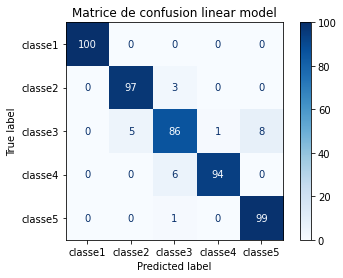

In [35]:
SVM_Classification(SVC, "linear", 1.0, df_app2, df_dec2, model_summary_TP2)

Performance: 0.95
Précision: 0.95
Rappel: 0.95
F1-score: 0.9500000000000001


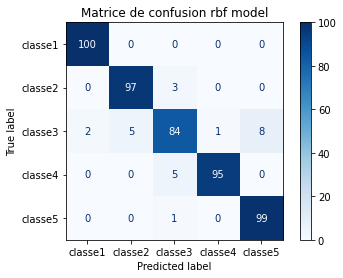

In [36]:
SVM_Classification(SVC, "rbf", 1.0, df_app2, df_dec2, model_summary_TP2)

Performance: 0.932
Précision: 0.932
Rappel: 0.932
F1-score: 0.932


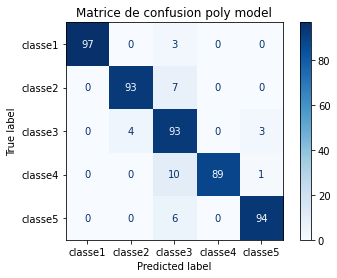

In [37]:
SVM_Classification(SVC, "poly", 1.0, df_app2, df_dec2, model_summary_TP2)

petit bonus :

Performance: 0.93
Précision: 0.93
Rappel: 0.93
F1-score: 0.93


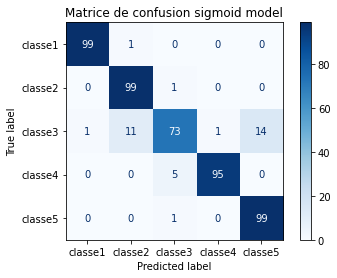

In [38]:
SVM_Classification(SVC, "sigmoid", 1.0, df_app2, df_dec2, model_summary_TP2)

# 3) Sur les jeux de données TP1 et TP2, rechercher les meilleurs hyperparamètres pour les 3 noyaux.

In [45]:
model_opti_summary = []

In [42]:
def getHyperBestParam(X_train, y_train, X_test, y_test):
    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                        {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            SVC(), tuned_parameters, scoring='%s_macro' % score
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

    # Note the problem is too easy: the hyperparameter plateau is too flat and the
    # output model is the same for precision and recall with ties in quality.

## Recherche d'un bon hyper paramètre pour le jeu TP1

In [43]:
getHyperBestParam(df_app1.iloc[:,1:3], df_app1.iloc[:,0], df_dec1.iloc[:,1:3], df_dec1.iloc[:,0])

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.996 (+/-0.009) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.992 (+/-0.008) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.998 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.996 (+/-0.009) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.998 (+/-0.008) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.998 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.994 (+/-0.009) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.998 (+/-0.008) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.998 (+/-0.008) for {'C': 1, 'kernel': 'linear'}
0.994 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
0.994 (+/-0.009) for {'C': 100, 'kernel': 'linear'}
0.994 (+/-0.009) for {'C': 1000, 'kernel': 'linear'}
0.989 (+/-0.007) for {'C': 1, 'kernel': 'poly'}
0.991 (+/-0.012) for {'C': 10, 'kernel': 'poly'}
0.994 (+/-0.

### **pour TP1, le meilleur noyau est << RBF >>, le meilleur hyper paramètre associé est 10 et le bon gamma est 0.001**

Performance: 0.994
Précision: 0.994
Rappel: 0.994
F1-score: 0.994


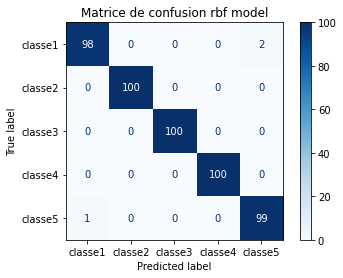

In [47]:
SVM_Classification(SVC, "rbf", 10, df_app1, df_dec1, model_opti_summary, 0.001)

## Recherche d'un bon hyper paramètre pour le jeu TP2

In [48]:
getHyperBestParam(df_app2.iloc[:,1:3], df_app2.iloc[:,0], df_dec2.iloc[:,1:3], df_dec2.iloc[:,0])

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.955 (+/-0.020) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.895 (+/-0.057) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.024) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.955 (+/-0.020) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.953 (+/-0.030) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.947 (+/-0.024) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.031) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.953 (+/-0.030) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.946 (+/-0.042) for {'C': 1, 'kernel': 'linear'}
0.946 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.040) for {'C': 100, 'kernel': 'linear'}
0.946 (+/-0.036) for {'C': 1000, 'kernel': 'linear'}
0.936 (+/-0.040) for {'C': 1, 'kernel': 'poly'}
0.942 (+/-0.036) for {'C': 10, 'kernel': 'poly'}
0.942 (+/-0.0

### **pour TP2, le meilleur noyau est << RBF >>, le meilleur hyper paramètre associé est 100 et le bon gamma est 0.001**

Performance: 0.95
Précision: 0.95
Rappel: 0.95
F1-score: 0.9500000000000001


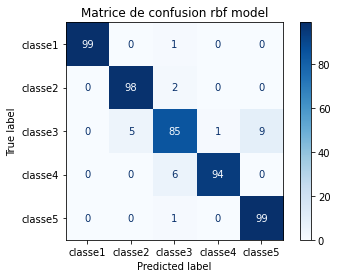

In [49]:
SVM_Classification(SVC, "rbf", 100, df_app2, df_dec2, model_opti_summary, 0.001)

****

# 4) Bonus : Model summary

###  4.1) Résumé TP1

In [107]:
df_sum_TP1 = pd.DataFrame(model_summary_TP1)

In [113]:
df_sum_TP1

,model,accuracy_score
0,SVM linear,0.996
1,SVM rbf,0.996
2,SVM poly,0.986
3,SVM sigmoid,0.996


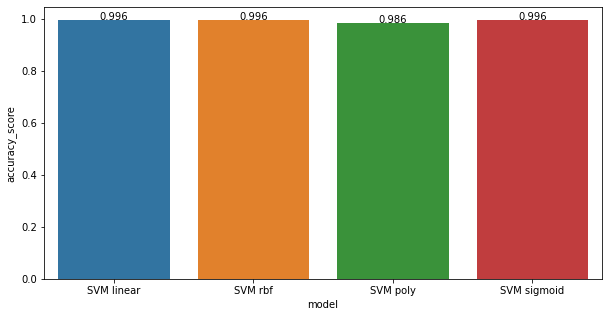

In [108]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='accuracy_score', x='model', data=df_sum_TP1)
# j'ajoute les valeurs
for index, row in df_sum_TP1.iterrows():
    ax.text(row.name,row.accuracy_score, round(row.accuracy_score,3), color='black', ha="center")

plt.show()

#### Commentaire :

Pour notre jeu TP1, sans cross validation, il s'avère que nous pouvons obtenir un bon résultat rien qu'avec un noyau Linéaire de plus ceci s'explique car les données que nos données sont dailleurs elles mêmes linéairement séparable.

****

###  4.2) Résumé TP2

In [109]:
df_sum_TP2 = pd.DataFrame(model_summary_TP2)

In [114]:
df_sum_TP2

,model,accuracy_score
0,SVM linear,0.952
1,SVM rbf,0.950
2,SVM poly,0.932
3,SVM sigmoid,0.930


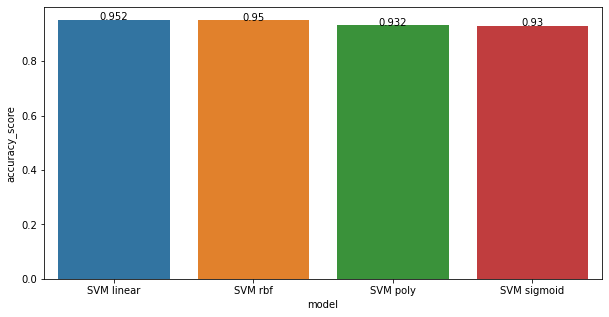

In [110]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='accuracy_score', x='model', data=df_sum_TP2)
# j'ajoute les valeurs
for index, row in df_sum_TP2.iterrows():
    ax.text(row.name,row.accuracy_score, round(row.accuracy_score,3), color='black', ha="center")

plt.show()

#### Commentaire :

Pour le jeu de données 2, sans Cross validation un noyau linéaire semble donner des résultats satisfaisant.

****

###  4.2) Résumé sur les meilleurs Hyper-paramètres selon les jeux de donénes 1 et 2

In [150]:
df_sum = pd.DataFrame(model_opti_summary)

In [157]:
df_sum.iloc[0,0]="Best model for TP1 : SVM_SVC(C:10,gamma:0.001)"
df_sum.iloc[1,0]="Best model for TP2 : SVM_SVC(C:100,gamma:0.001)"

In [158]:
df_sum

,model,accuracy_score
0,"Best model for TP1 : SVM_SVC(C:10,gamma:0.001)",0.994
1,"Best model for TP2 : SVM_SVC(C:100,gamma:0.001)",0.950


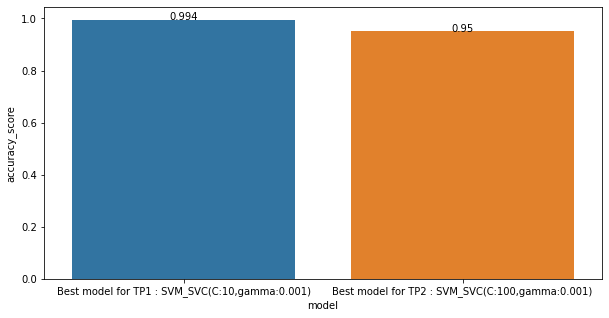

In [160]:
figure = plt.figure(figsize=(10,5))
ax = sn.barplot(y='accuracy_score', x='model', data=df_sum)
# j'ajoute les valeurs
for index, row in df_sum.iterrows():
    ax.text(row.name,row.accuracy_score, round(row.accuracy_score,4), color='black', ha="center")
    
plt.show()

#### Commentaire :

Enfin on peut observer la performance de nos 2 modèles, avec leur meilleur hyper paramètre respectif.

Dans les 2 cas de figures : Un modèle SVM, type SVC avec comme hyper-paramètres C=10 (C=100) notre vitesse d'apprentissage et, Gamma=0.001, au départ nous étions parti d'un gamma = 0.7 mais lors de l'étape de recherche des régulateur optimal nous emmène à une réduction de ce dernier ce qui signifie que, afin de ne pas sur ajuster les données, on le réduit de tel sorte qu'on ait une frontère de décision beaucoup plus fine et donc, une courbe en cloche beaucoup plus élargit...bref, une zone d'influence pour élargit pour chaque observation.

#### Autre chose :

Le modèle LinearSVC semble aussi efficace qu'un modèle SVC.